# Gravitational waves in general relativity XIII Caustic property of plane waves by Bondi & Pirani 
##  Geoff Cope
##  Univeristy of Utah
##  December 22, 2021

Here we concentrate on metric 2.1

https://royalsocietypublishing.org/doi/abs/10.1098/rspa.1989.0016

In [1]:
from sympy import init_session
init_session(use_latex=True)

IPython console for SymPy 1.9 (Python 3.8.8-64-bit) (ground types: gmpy)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at https://docs.sympy.org/1.9/



In [2]:
import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)

In [4]:
u,v,eta,zeta,du,dv,deta,dzeta,beta,phi = symbols( 'u v eta zeta du dv deta dzeta beta phi' ) 

In [5]:
beta = Function('beta')(u)
beta

In [21]:
phi = Function('phi')(u)
phi

In [8]:
variables = Matrix( [u,v,eta,zeta] )
variables

⎡u⎤
⎢ ⎥
⎢v⎥
⎢ ⎥
⎢η⎥
⎢ ⎥
⎣ζ⎦

In [9]:
differentials = Matrix( [du,dv,deta,dzeta] ) 
differentials

⎡ du  ⎤
⎢     ⎥
⎢ dv  ⎥
⎢     ⎥
⎢deta ⎥
⎢     ⎥
⎣dzeta⎦

In [22]:
lineElement = exp(2*phi)*du*dv - u**2 * ( exp(2*beta)*deta**2 + exp(-2*beta)*dzeta**2)
lineElementExpanded = expand(exp(2*phi)*du*dv - u**2 * ( exp(2*beta)*deta**2 + exp(-2*beta)*dzeta**2))

In [23]:
lineElement

In [24]:
lineElementExpanded

In [25]:
g = zeros(4)

for i in range(4):
    for j in range(4):
        if i == j:
            g[i,j] = lineElementExpanded.coeff( differentials[i],2 ) 
        else:
            g[i,j] = Rational(1,2)*lineElementExpanded.coeff( differentials[i]*differentials[j],1 )
            
g

⎡          2⋅φ(u)                           ⎤
⎢         ℯ                                 ⎥
⎢   0     ───────       0            0      ⎥
⎢            2                              ⎥
⎢                                           ⎥
⎢ 2⋅φ(u)                                    ⎥
⎢ℯ                                          ⎥
⎢───────     0          0            0      ⎥
⎢   2                                       ⎥
⎢                                           ⎥
⎢                    2  2⋅β(u)              ⎥
⎢   0        0     -u ⋅ℯ             0      ⎥
⎢                                           ⎥
⎢                                 2  -2⋅β(u)⎥
⎣   0        0          0       -u ⋅ℯ       ⎦

In [26]:
import sympy

In [27]:
m = sympy.Array(g)
m

⎡          2⋅φ(u)                           ⎤
⎢         ℯ                                 ⎥
⎢   0     ───────       0            0      ⎥
⎢            2                              ⎥
⎢                                           ⎥
⎢ 2⋅φ(u)                                    ⎥
⎢ℯ                                          ⎥
⎢───────     0          0            0      ⎥
⎢   2                                       ⎥
⎢                                           ⎥
⎢                    2  2⋅β(u)              ⎥
⎢   0        0     -u ⋅ℯ             0      ⎥
⎢                                           ⎥
⎢                                 2  -2⋅β(u)⎥
⎣   0        0          0       -u ⋅ℯ       ⎦

In [28]:
from einsteinpy.symbolic import *

In [29]:
syms = sympy.symbols("u v x y")
u,v,x,y = syms

In [30]:
metric = MetricTensor(m,syms)

In [37]:
ch = ChristoffelSymbols.from_metric(metric)
simplify(ch.tensor())

⎡                       ⎡0  0                    0                                       0  
⎢⎡  d                ⎤  ⎢                                                                   
⎢⎢2⋅──(φ(u))  0  0  0⎥  ⎢0  0                    0                                       0  
⎢⎢  du               ⎥  ⎢                                                                   
⎢⎢                   ⎥  ⎢          ⎛  d           ⎞  2⋅β(u) - 2⋅φ(u)                        
⎢⎢    0       0  0  0⎥  ⎢0  0  2⋅u⋅⎜u⋅──(β(u)) + 1⎟⋅ℯ                                    0  
⎢⎢                   ⎥  ⎢          ⎝  du          ⎠                                         
⎢⎢    0       0  0  0⎥  ⎢                                                                   
⎢⎢                   ⎥  ⎢                                                 ⎛    d           ⎞
⎢⎣    0       0  0  0⎦  ⎢0  0                    0                    2⋅u⋅⎜- u⋅──(β(u)) + 1⎟
⎣                       ⎣                                             

In [32]:
Ric = RicciTensor.from_metric(metric)
Ric.tensor()

⎡                    d                ⎤
⎢              2   4⋅──(φ(u))         ⎥
⎢    ⎛d       ⎞      du               ⎥
⎢- 2⋅⎜──(β(u))⎟  + ──────────  0  0  0⎥
⎢    ⎝du      ⎠        u              ⎥
⎢                                     ⎥
⎢             0                0  0  0⎥
⎢                                     ⎥
⎢             0                0  0  0⎥
⎢                                     ⎥
⎣             0                0  0  0⎦

In [33]:
einst = EinsteinTensor.from_metric(metric)
einst.tensor()

⎡                    d                ⎤
⎢              2   4⋅──(φ(u))         ⎥
⎢    ⎛d       ⎞      du               ⎥
⎢- 2⋅⎜──(β(u))⎟  + ──────────  0  0  0⎥
⎢    ⎝du      ⎠        u              ⎥
⎢                                     ⎥
⎢             0                0  0  0⎥
⎢                                     ⎥
⎢             0                0  0  0⎥
⎢                                     ⎥
⎣             0                0  0  0⎦

In [34]:
R = RicciScalar.from_riccitensor(Ric)
R.simplify()
R.expr

In [35]:
rm1 = RiemannCurvatureTensor.from_christoffels(ch)
rm1.tensor()

⎡                                                                       ⎡0  0  0  0⎤        
⎢                                                                       ⎢          ⎥        
⎢                                                                       ⎢0  0  0  0⎥        
⎢                                                                       ⎢          ⎥        
⎢                                                                       ⎢0  0  0  0⎥        
⎢                                                                       ⎢          ⎥        
⎢                                                                       ⎣0  0  0  0⎦        
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                     

In [39]:
weyl = WeylTensor.from_metric(metric)
simplify(weyl.tensor())

⎡                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                             ⎡0  0  0  0⎤                  
⎢                                                             ⎢          ⎥                  
⎢                                                             ⎢0  0  0  0⎥                  
⎢                                                             ⎢          ⎥                  
⎢                                                             ⎢0  0  0  0⎥                  
⎢                                                             ⎢          ⎥                  
⎢                                                             ⎣0  0  0

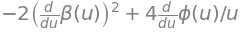

In [38]:
Ric.tensor()[0,0]